In [1]:
import os
import netCDF4
from kid_readout.measurement import core
from kid_readout.measurement.io import nc
from kid_readout.measurement.measurements import legacy, array
from kid_readout.measurement.io import readoutnc
from kid_readout.analysis.resonator import plot_resonator

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
frequency = np.linspace(1, 2, 11)
epoch = np.linspace(0, 1, 1e3)
s21 = (np.repeat(4 * np.arange(frequency.size).reshape((frequency.size, 1)), epoch.size, axis=1) + 
       np.random.randn(frequency.size, epoch.size) + 1j * np.random.randn(frequency.size, epoch.size))

In [3]:
sa = array.StreamArray(frequency, epoch, s21)

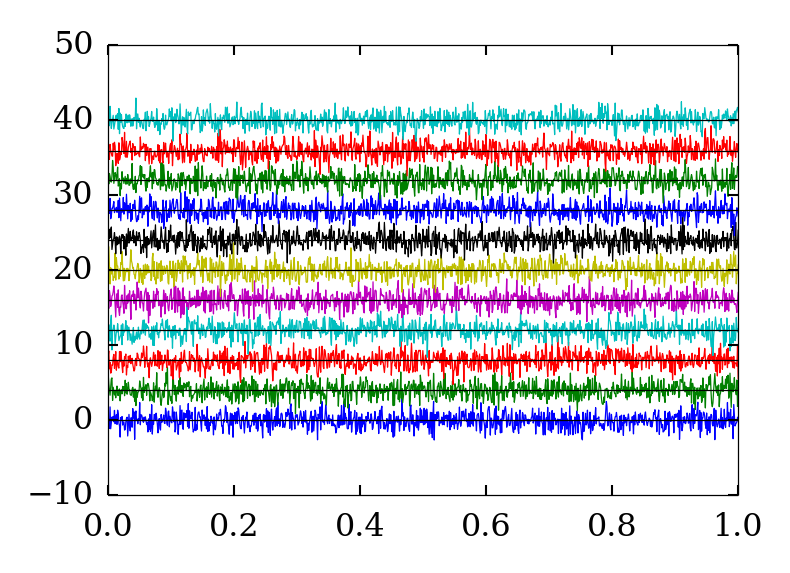

In [4]:
fig, ax = plt.subplots()
for n in range(frequency.size):
    sn = sa.stream(n)
    ax.plot(sn.epoch, sn.s21.real)
    ax.axhline(sn.s21_mean.real, color='k')

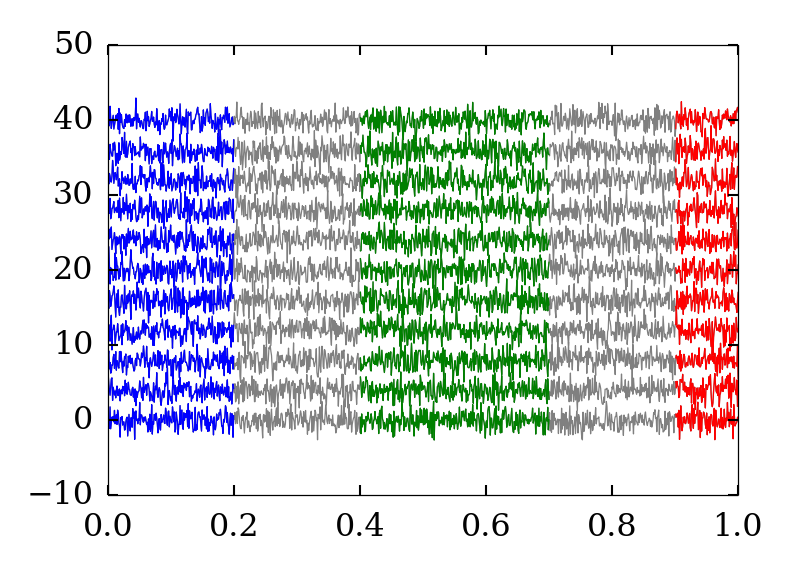

In [5]:
fig, ax = plt.subplots()
sliced0 = sa[-1:2]
sliced1 = sa[0:0.2]
sliced2 = sa[0.4:0.7]
sliced3 = sa[0.9:2]
for n in range(frequency.size):
    ax.plot(sliced0.epoch, sliced0.s21.real[n], color='gray')
    ax.plot(sliced1.epoch, sliced1.s21.real[n], color='blue')
    ax.plot(sliced2.epoch, sliced2.s21.real[n], color='green')
    ax.plot(sliced3.epoch, sliced3.s21.real[n], color='red')